# 🔐 Code Session

-----------------------

## 📚 Imports

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import roc_auc_score,precision_recall_curve,roc_curve
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn import model_selection

from sklearn.model_selection import GridSearchCV, StratifiedKFold, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
from IPython.display import HTML

pd.set_option('max_columns', 50)

## 📥 Load dataset

In [2]:
df = pd.read_csv('original.csv')
df.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [3]:
df.shape

(2000, 5)

In [4]:
# quick look at the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  2000 non-null   int64  
 1   income    2000 non-null   float64
 2   age       1997 non-null   float64
 3   loan      2000 non-null   float64
 4   default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.2 KB


In [5]:
target = 'default'  
num_vars = list(df.columns.drop(['clientid', 'default']))
#cat_vars = list(df.columns.drop([''])) # there's no categorical features within the dataset

## 🔎 EDA (Exploratory Data Analysis) 

### Local EDA


In [6]:
# choosing any id
df.tail()

,clientid,income,age,loan,default
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0
1999,2000,69436.579552,56.152617,7378.833599,0


### Overall EDA

### 🧮 Descriptive Measures

In [7]:
descriptive_measures = round(df.drop(['clientid','default'],axis=1).describe(),2)
descriptive_measures

,income,age,loan
count,2000.00,1997.00,2000.00
mean,45331.60,40.81,4444.37
std,14326.33,13.62,3045.41
min,20014.49,-52.42,1.38
25%,32796.46,28.99,1939.71
50%,45789.12,41.32,3974.72
75%,57791.28,52.59,6432.41
max,69995.69,63.97,13766.05


### 📊 Data Visualization

#### dependent variable (*target*)

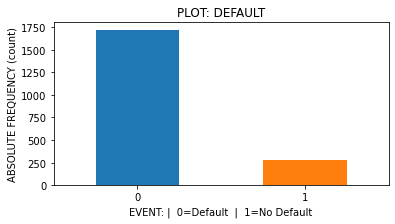

In [8]:
# Visualização da variável binária (target)
df.default.value_counts().plot(kind = 'bar', color = ['C0', 'C1'], figsize=(6, 3), rot=0, title='PLOT: DEFAULT')
plt.xlabel("EVENT: |  0=Default  |  1=No Default")
plt.ylabel("ABSOLUTE FREQUENCY (count)");

In [9]:
# Overview of  binary variable (target)
inad = df.default.value_counts()[0]
ad = df.default.value_counts()[1]
print('Total NO DEFAULT(0):', ad, 'lines, representing', round((ad/(inad+ad))*100,2),'% of the dataset')
print('Total DEFAULT(1):', inad, 'lines, representing', round((inad/(inad+ad))*100,2),'% of the dataset')

Total NO DEFAULT(0): 283 lines, representing 14.15 % of the dataset
Total DEFAULT(1): 1717 lines, representing 85.85 % of the dataset


#### independent variable (*features*)

C:\Users\Dell\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Dell\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


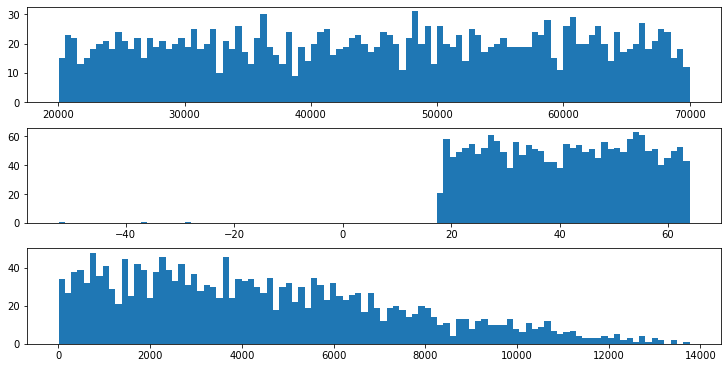

In [10]:
# code for plotting multiple HISTOGRAM
fig, axs = plt.subplots(3,1, figsize=(10, 5),constrained_layout=True)
axs[0].hist(df['income'],bins=100)
axs[1].hist(df['age'], bins=100)
axs[2].hist(df['loan'], bins=100)
plt.show();

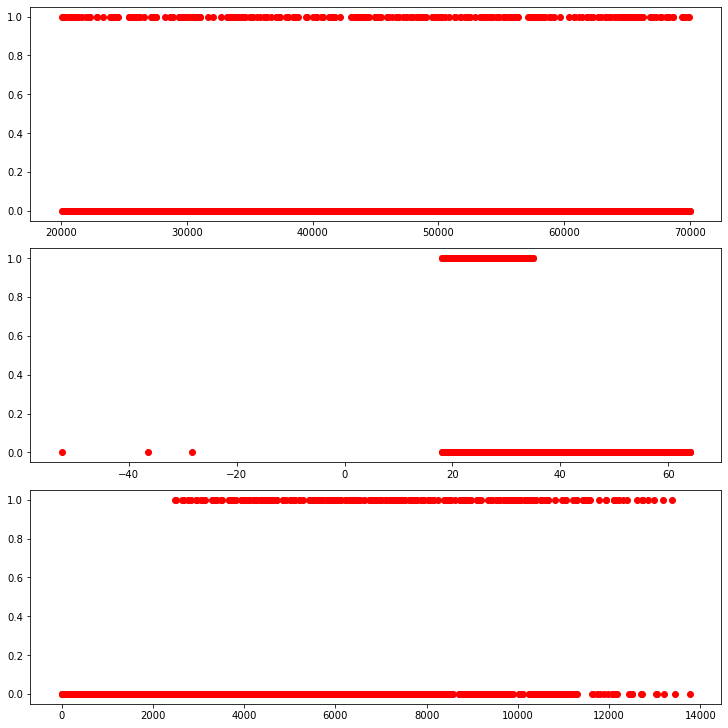

In [11]:
# code for plotting multiple SCATTER PLOTS
fig, axs = plt.subplots(3,1, figsize=(10,10),constrained_layout=True)

axs[0].scatter(x=df['income'], y=df['default'], marker='o', color='r')
axs[1].scatter(x=df['age'], y=df['default'], marker='o', color='r')
axs[2].scatter(x=df['loan'], y=df['default'], marker='o', color='r')


plt.show();

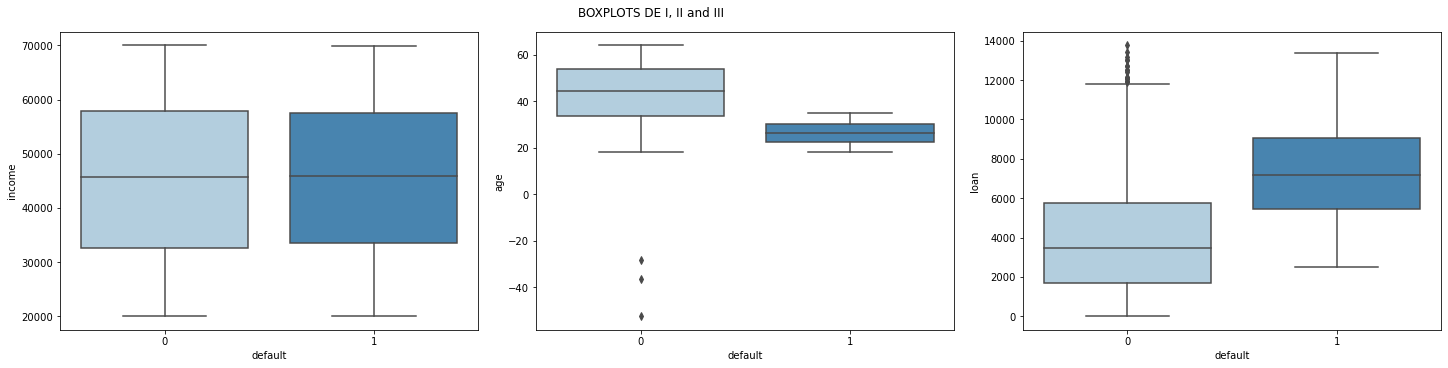

In [12]:
# code for plotting multiple BOXPLOTS
fig, axes = plt.subplots(1, 3, figsize=(20, 5),constrained_layout=True)
fig.suptitle('BOXPLOTS DE I, II and III', ha = 'right')
my_pal="Blues"

sns.boxplot(ax=axes[0], data=df, x = target, y="income", palette=my_pal)
sns.boxplot(ax=axes[1], data=df, x = target, y="age", palette=my_pal)
sns.boxplot(ax=axes[2], data=df, x = target, y="loan", palette=my_pal);

In [13]:
# Asymmetry x Kurtosis calculation 
data_k_s = {'Asymmetry':  df[num_vars].skew(), 'Kurtosis': df[num_vars].kurtosis()}
df_k_s = pd.DataFrame (data_k_s, columns = ['Asymmetry','Kurtosis'])
df_k_s

,Asymmetry,Kurtosis
income,-0.042621,-1.201708
age,-0.307964,0.549445
loan,0.624284,-0.337330


### Missing Values

In [14]:
(df.isnull().sum()* 100 / len(df)).sort_values(ascending=False).head(10).reset_index()

,index,0
0,age,0.15
1,default,0.00
2,loan,0.00
3,income,0.00
4,clientid,0.00


In [15]:
df.dropna(inplace=True)

### Data Duplicate Analysis

In [16]:
df.drop(columns="clientid",inplace=True)

features = df.columns.values[0:30]
unique_max_train = []
for feature in features:
    values = df[feature].value_counts()
    unique_max_train.append([feature, values.max(), values.idxmax()])

np.transpose((pd.DataFrame(unique_max_train, columns=['Feature', 'Max duplicates', 'Value'])).\
            sort_values(by = 'Max duplicates', ascending=False).head(15))

,3,0,1,2
Feature,default,income,age,loan
Max duplicates,1714,1,1,1
Value,0,50719.8,49.5,2365.29


#### Value Counts Target

In [17]:
df['default'].value_counts()

0    1714
1     283
Name: default, dtype: int64

In [18]:
train_X = df.drop(["default"], axis=1)
train_y = np.log1p(df["default"].values)

#### Correlation between features

In [51]:
df.corr()

,income,age,loan,default
income,1.000000,-0.033687,0.441539,0.002222
age,-0.033687,1.000000,0.002309,-0.429759
loan,0.441539,0.002309,1.000000,0.377169
default,0.002222,-0.429759,0.377169,1.000000


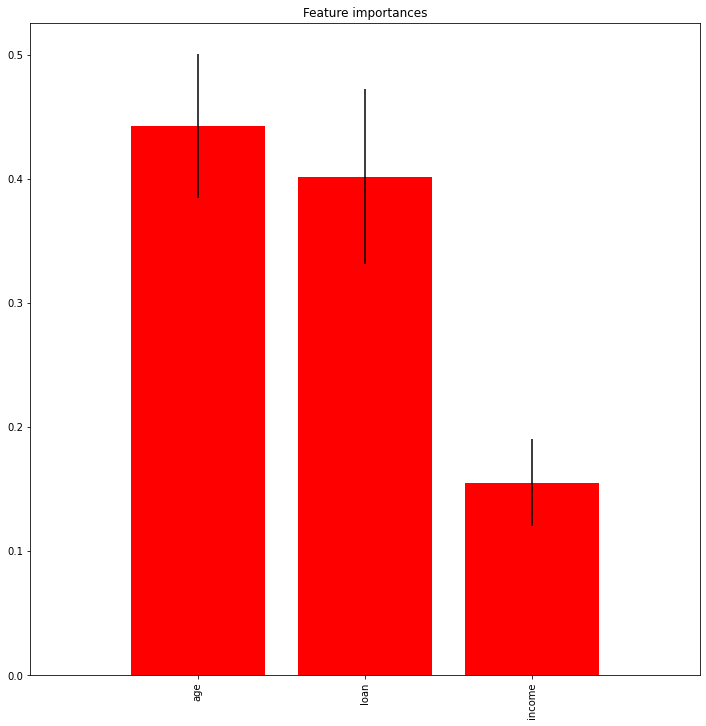

In [19]:
from sklearn import ensemble
model = ensemble.ExtraTreesRegressor(n_estimators=200, max_depth=20, max_features=0.5, n_jobs=-1, random_state=0)
model.fit(train_X, train_y)

## plotando as importâncias ##
feat_names = df.columns.values
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20]

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

In [20]:
def plot_new_feature_distribution(df1, df2, label1, label2, features, n):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(2,n,figsize=(18,8))

    for feature in features:
        i += 1
        plt.subplot(2,n,i)
        sns.kdeplot(df1[feature], bw=0.5,label=label1)
        sns.kdeplot(df2[feature], bw=0.5,label=label2)
        plt.xlabel(feature, fontsize=11)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=8)
        plt.tick_params(axis='y', which='major', labelsize=8)
    plt.show();

### Baseline

In [21]:
def plot_roc(y_test,prob):
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    # plot no skill
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    plt.title("ROC curve")
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    # show the plot
    plt.show()

In [22]:
def logistic(X,y):
    y_train=df['default'].astype('uint8')
    X_train,X_test,y_train,y_test=train_test_split(df.drop('default',axis=1),y_train,test_size=.2,random_state=2020)
    lr=LogisticRegression()
    lr.fit(X_train,y_train)
    prob=lr.predict_proba(X_test)
    
    roc=roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])
    print('roc ',roc)

    return (prob[:,1],y_test)
y_train=df['default'].astype('uint8')
probs,y_test=logistic(df.drop('default',axis=1),y_train)

roc  0.986772068511199


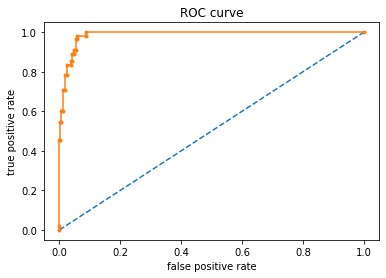

In [23]:
plot_roc(y_test,probs)

#### *Logistic Regression*

In [24]:
train_x, val_x, train_y, val_y=train_test_split(df.drop('default',axis=1),y_train,test_size=.2,random_state=22)

clf = LogisticRegression(solver="lbfgs").fit(train_x, train_y)
pred_y = clf.predict(val_x)

In [26]:
accuracy_score(val_y, pred_y)

0.955

In [27]:
rocrl=roc_auc_score(val_y, pred_y)
rocrl

0.9051383399209486

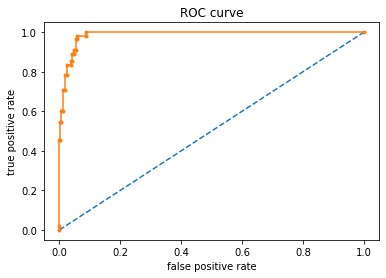

In [28]:
plot_roc(val_y, pred_y)

#### *Random Forest Classifier*

In [29]:
%%time
model = RandomForestClassifier(n_estimators=220).fit(train_x,train_y)
predictionforest = model.predict(val_x)

Wall time: 504 ms


In [30]:
accuracy_score(val_y, predictionforest)

0.9925

In [31]:
%%time
rocrf=roc_auc_score(val_y, predictionforest)
print('roc ',rocrf)

roc  0.9727272727272727
Wall time: 2.99 ms


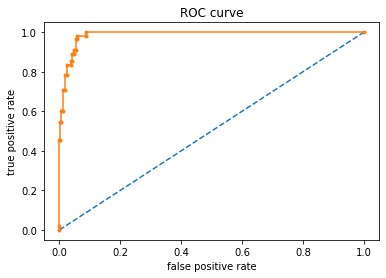

In [32]:
plot_roc(val_y, predictionforest)

## Grid Search CV

In [37]:
%%time
# Logistic regression 
log_cfl = LogisticRegression()

param_grid = {
            'penalty' : ['l1','l2'], 
            'class_weight' : ['balanced', None], 
            'C' : [0.1, 1, 10, 100]
            }

CV_log_cfl = GridSearchCV(estimator = log_cfl, param_grid = param_grid , scoring = 'roc_auc', verbose = 1, n_jobs = -1)
CV_log_cfl.fit(train_x, train_y)

best_parameters = CV_log_cfl.best_params_
print("The best parameters: ", best_parameters)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


The best parameters:  {'C': 0.1, 'class_weight': None, 'penalty': 'l2'}
Wall time: 3.88 s


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    3.7s finished


#### *Logistic Regression*

In [40]:
log_cfl = LogisticRegression(C = best_parameters['C'], 
                             penalty = best_parameters['penalty'], 
                             class_weight = best_parameters['class_weight'])

log_cfl.fit(train_x, train_y)
y_scoreLR = log_cfl.decision_function(val_x)

In [41]:
rocLR=roc_auc_score(val_y, y_scoreLR)
print('roc ',rocLR)

roc  0.986772068511199


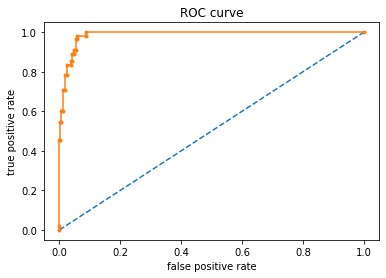

In [42]:
plot_roc(val_y, y_scoreLR)

#### *Random Forest Classifier*

In [43]:
rf_cfl = RandomForestClassifier(n_estimators=120).fit(train_x, train_y)

In [44]:
param_grid = {
            'n_estimators': [50, 100, 200],
            'max_features': [2, 3],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10]
            }

CV_rnd_cfl = GridSearchCV(estimator = rf_cfl, param_grid = param_grid, scoring = 'roc_auc', verbose = 10, n_jobs = -1)
CV_rnd_cfl.fit(train_x, train_y)

best_parameters = CV_rnd_cfl.best_params_
print("The best parameters: ", best_parameters)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   

The best parameters:  {'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [45]:
rf_cfl = RandomForestClassifier(n_estimators = best_parameters['n_estimators'], 
                                 max_features = best_parameters['max_features'],  
                                 min_samples_leaf = best_parameters['min_samples_leaf'],  
                                 min_samples_split = 5)
rf_cfl.fit(train_x, train_y)
y_score = rf_cfl.predict_proba(val_x)[:,1]

In [46]:
rocRF=roc_auc_score(val_y, y_score)
print('roc ',rocRF)

roc  0.9999472990777338


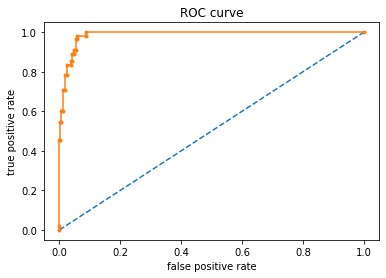

In [40]:
plot_roc(val_y, y_score)